<a href="https://colab.research.google.com/github/arutraj/.githubcl/blob/main/Project_United_Nations_Debate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of Contents

1. Loading the dataset
2. Data Pre-processing
3. Rule 1 - Extracting the sentences with President's mention
4. Rule 2 - Extracting the mentions of initiatives
5. Rule 3 - Relation Extraction part 1
6. Rule 4 - Relation Extraction part 2
7. Combining Rule 3 and Rule 4
8. Rule 5: Patterns using Preposition

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Loading the dataset

In [2]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# extract the zip file
!unzip '/content/drive/MyDrive/AnalyticsVidya/NLP/UNGDC19702018-200902-235056.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Converted sessions/Session 63 - 2008/PHL_63_2008.txt  
  inflating: __MACOSX/Converted sessions/Session 63 - 2008/._PHL_63_2008.txt  
  inflating: Converted sessions/Session 63 - 2008/DZA_63_2008.txt  
  inflating: __MACOSX/Converted sessions/Session 63 - 2008/._DZA_63_2008.txt  
  inflating: Converted sessions/Session 63 - 2008/MEX_63_2008.txt  
  inflating: __MACOSX/Converted sessions/Session 63 - 2008/._MEX_63_2008.txt  
  inflating: Converted sessions/Session 63 - 2008/AUT_63_2008.txt  
  inflating: __MACOSX/Converted sessions/Session 63 - 2008/._AUT_63_2008.txt  
  inflating: Converted sessions/Session 63 - 2008/COG_63_2008.txt  
  inflating: __MACOSX/Converted sessions/Session 63 - 2008/._COG_63_2008.txt  
  inflating: Converted sessions/Session 63 - 2008/CYP_63_2008.txt  
  inflating: __MACOSX/Converted sessions/Session 63 - 2008/._CYP_63_2008.txt  
  inflating: Converted sessions/Session 63 - 2008/SLB_63_2008.txt  

In [4]:
# folders of different sessions of speeches
!ls '/content/Converted sessions'

'Session 25 - 1970'  'Session 38 - 1983'  'Session 51 - 1996'  'Session 64 - 2009'
'Session 26 - 1971'  'Session 39 - 1984'  'Session 52 - 1997'  'Session 65 - 2010'
'Session 27 - 1972'  'Session 40 - 1985'  'Session 53 - 1998'  'Session 66 - 2011'
'Session 28 - 1973'  'Session 41 - 1986'  'Session 54 - 1999'  'Session 67 - 2012'
'Session 29 - 1974'  'Session 42 - 1987'  'Session 55 - 2000'  'Session 68 - 2013'
'Session 30 - 1975'  'Session 43 - 1988'  'Session 56 - 2001'  'Session 69 - 2014'
'Session 31 - 1976'  'Session 44 - 1989'  'Session 57 - 2002'  'Session 70 - 2015'
'Session 32 - 1977'  'Session 45 - 1990'  'Session 58 - 2003'  'Session 71 - 2016'
'Session 33 - 1978'  'Session 46 - 1991'  'Session 59 - 2004'  'Session 72 - 2017'
'Session 34 - 1979'  'Session 47 - 1992'  'Session 60 - 2005'  'Session 73 - 2018'
'Session 35 - 1980'  'Session 48 - 1993'  'Session 61 - 2006'
'Session 36 - 1981'  'Session 49 - 1994'  'Session 62 - 2007'
'Session 37 - 1982'  'Session 50 - 1995'  'Ses

In [6]:
# speeches in a single folder
!ls '/content/Converted sessions/Session 25 - 1970'

ALB_25_1970.txt  DOM_25_1970.txt  IRQ_25_1970.txt  MEX_25_1970.txt  SOM_25_1970.txt
ARG_25_1970.txt  DZA_25_1970.txt  ISL_25_1970.txt  MMR_25_1970.txt  SYR_25_1970.txt
AUS_25_1970.txt  ECU_25_1970.txt  ISR_25_1970.txt  NLD_25_1970.txt  TGO_25_1970.txt
AUT_25_1970.txt  FRA_25_1970.txt  ITA_25_1970.txt  NOR_25_1970.txt  THA_25_1970.txt
BEL_25_1970.txt  GBR_25_1970.txt  JPN_25_1970.txt  NZL_25_1970.txt  TTO_25_1970.txt
BLR_25_1970.txt  GHA_25_1970.txt  KEN_25_1970.txt  PAK_25_1970.txt  TUN_25_1970.txt
BOL_25_1970.txt  GIN_25_1970.txt  KHM_25_1970.txt  PER_25_1970.txt  TUR_25_1970.txt
BRA_25_1970.txt  GMB_25_1970.txt  KWT_25_1970.txt  PHL_25_1970.txt  UKR_25_1970.txt
CAN_25_1970.txt  GTM_25_1970.txt  LBN_25_1970.txt  PRY_25_1970.txt  URY_25_1970.txt
CMR_25_1970.txt  HND_25_1970.txt  LBR_25_1970.txt  RWA_25_1970.txt  USA_25_1970.txt
COG_25_1970.txt  HTI_25_1970.txt  LBY_25_1970.txt  SDN_25_1970.txt  VEN_25_1970.txt
COL_25_1970.txt  IDN_25_1970.txt  LKA_25_1970.txt  SGP_25_1970.txt  YUG_25_1

## 2. Data Pre-processing

In [7]:
# importing libraries
import glob
import pandas as pd
import re

In [8]:
# names of all the folders in the dataset
folders = glob.glob('/content/Converted sessions/Session*')

In [9]:
# list of folders
folders

['/content/Converted sessions/Session 57 - 2002',
 '/content/Converted sessions/Session 68 - 2013',
 '/content/Converted sessions/Session 66 - 2011',
 '/content/Converted sessions/Session 62 - 2007',
 '/content/Converted sessions/Session 55 - 2000',
 '/content/Converted sessions/Session 72 - 2017',
 '/content/Converted sessions/Session 32 - 1977',
 '/content/Converted sessions/Session 58 - 2003',
 '/content/Converted sessions/Session 35 - 1980',
 '/content/Converted sessions/Session 37 - 1982',
 '/content/Converted sessions/Session 31 - 1976',
 '/content/Converted sessions/Session 51 - 1996',
 '/content/Converted sessions/Session 65 - 2010',
 '/content/Converted sessions/Session 56 - 2001',
 '/content/Converted sessions/Session 63 - 2008',
 '/content/Converted sessions/Session 70 - 2015',
 '/content/Converted sessions/Session 45 - 1990',
 '/content/Converted sessions/Session 53 - 1998',
 '/content/Converted sessions/Session 47 - 1992',
 '/content/Converted sessions/Session 30 - 1975',


In [10]:
# creating a Dataframe to store the speeches
df = pd.DataFrame(columns=['Country','Speech','Session','Year'])


In [11]:
# read speeches by USA
i = 0
# for each folder
for file in folders:
    # getting the txt file containing speech of USA
    speech = glob.glob(file+'/USA*.txt')
    # reading the txt file
    with open(speech[0],encoding='utf8') as f:
        # reading the speech
        df.loc[i,'Speech'] = f.read()
        # extracting the year of speech
        df.loc[i,'Year'] = speech[0].split('_')[-1].split('.')[0]
        # extracting the session
        df.loc[i,'Session'] = speech[0].split('_')[-2]
        # storing the country name
        df.loc[i,'Country'] = speech[0].split('_')[0].split("/")[-1]
        # Increment counter
        i += 1

In [12]:
# first 5 rows of the created dataset
df.head()

,Country,Speech,Session,Year
0,USA,﻿We meet one year and one day\nafter a terrori...,57,2002
1,USA,Each year we come together to \nreaffirm the f...,68,2013
2,USA,It is a great honour for me to \nbe here today...,66,2011
3,USA,Thank you for the opportunity \nto address the...,62,2007
4,USA,I am\nhonoured to address the Assembly on beha...,55,2000


In [13]:
# sample speech from the dataset
df['Speech'][4]

"I am\nhonoured to address the Assembly on behalf of the\nUnited States and to reinforce the eloquent message\nPresident C1inton conveyed during last week's\nMillennium Summit. Because my father worked here\nwhen I was young, I have always considered myself a\nchild of the United Nations. And because I had the\nprivilege to serve here as America's Permanent\nRepresentative, I feel at home and so will speak\nplainly.\nThe members of this body reflect virtually every\nculture, ethnicity and geographical region. We are city\nand country, inland and island, tropical and temperate,\ndeveloping and industrialized. We are as diverse as\nhumanity.\nAnd yet, in responding to the daunting demands\nof this new era, we are bound together by the interests\nwe share and the ideals to which we aspire.\nWe all have a stake in building peace and\nrelieving poverty, championing development and\ncurbing disease. We all want to see the dangers posed\nby weapons of mass destruction reduced, refugees\ncared

In [14]:
# function to preprocess speech
def clean(text):
    # removing paragraph numbers
    text = re.sub('[0-9]+.\t','',str(text))
    # removing new line characters
    text = re.sub('\n ','',str(text))
    text = re.sub('\n',' ',str(text))
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    # removing hyphens
    text = re.sub("-",' ',str(text))
    text = re.sub("— ",'',str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    # removing salutations
    text = re.sub("Mr\.",'Mr',str(text))
    text = re.sub("Mrs\.",'Mrs',str(text))
    # removing any reference to outside text
    text = re.sub("[\(\[].*?[\)\]]", "", str(text))

    return text

In [15]:
# preprocessing speeches
df['Speech_clean'] = df['Speech'].apply(clean)

In [16]:
# first 5 rows of the dataset
df.head()

,Country,Speech,Session,Year,Speech_clean
0,USA,﻿We meet one year and one day\nafter a terrori...,57,2002,﻿We meet one year and one day after a terroris...
1,USA,Each year we come together to \nreaffirm the f...,68,2013,Each year we come together to reaffirm the fo...
2,USA,It is a great honour for me to \nbe here today...,66,2011,It is a great honour for me to be here today....
3,USA,Thank you for the opportunity \nto address the...,62,2007,Thank you for the opportunity to address the ...
4,USA,I am\nhonoured to address the Assembly on beha...,55,2000,I am honoured to address the Assembly on behal...


In [17]:
# sample cleaned speech
df['Speech_clean'][4]

'I am honoured to address the Assembly on behalf of the United States and to reinforce the eloquent message President C1inton conveyed during last week Millennium Summit. Because my father worked here when I was young, I have always considered myself a child of the United Nations. And because I had the privilege to serve here as America Permanent Representative, I feel at home and so will speak plainly. The members of this body reflect virtually every culture, ethnicity and geographical region. We are city and country, inland and island, tropical and temperate, developing and industrialized. We are as diverse as humanity. And yet, in responding to the daunting demands of this new era, we are bound together by the interests we share and the ideals to which we aspire. We all have a stake in building peace and relieving poverty, championing development and curbing disease. We all want to see the dangers posed by weapons of mass destruction reduced, refugees cared for, children nourished, 

In [18]:
# splitting sentences
def sentences(text):
    # split sentences and questions
    text = re.split('[.?]', text)
    clean_sent = []
    for sent in text:
        clean_sent.append(sent)
    return clean_sent

In [19]:
# creating a new column to store the sentences
df['Sentence'] = df['Speech_clean'].apply(sentences)

In [20]:
# first 5 rows
df.head()

,Country,Speech,Session,Year,Speech_clean,Sentence
0,USA,﻿We meet one year and one day\nafter a terrori...,57,2002,﻿We meet one year and one day after a terroris...,[﻿We meet one year and one day after a terrori...
1,USA,Each year we come together to \nreaffirm the f...,68,2013,Each year we come together to reaffirm the fo...,[Each year we come together to reaffirm the f...
2,USA,It is a great honour for me to \nbe here today...,66,2011,It is a great honour for me to be here today....,[It is a great honour for me to be here today...
3,USA,Thank you for the opportunity \nto address the...,62,2007,Thank you for the opportunity to address the ...,[Thank you for the opportunity to address the...
4,USA,I am\nhonoured to address the Assembly on beha...,55,2000,I am honoured to address the Assembly on behal...,[I am honoured to address the Assembly on beha...


In [21]:
# sample sentence list from the dataset
df['Sentence'][4]

['I am honoured to address the Assembly on behalf of the United States and to reinforce the eloquent message President C1inton conveyed during last week Millennium Summit',
 ' Because my father worked here when I was young, I have always considered myself a child of the United Nations',
 ' And because I had the privilege to serve here as America Permanent Representative, I feel at home and so will speak plainly',
 ' The members of this body reflect virtually every culture, ethnicity and geographical region',
 ' We are city and country, inland and island, tropical and temperate, developing and industrialized',
 ' We are as diverse as humanity',
 ' And yet, in responding to the daunting demands of this new era, we are bound together by the interests we share and the ideals to which we aspire',
 ' We all have a stake in building peace and relieving poverty, championing development and curbing disease',
 ' We all want to see the dangers posed by weapons of mass destruction reduced, refugee

In [22]:
# create a dataframe containing sentences
df2 = pd.DataFrame(columns=['Sentence','Year','Len'])

row_list = []

# for each speech
for i in range(len(df)):
    # for each sentence
    for sent in df.loc[i,'Sentence']:

        # calculating the word count in a sentence
        wordcount = len(sent.split())
        # extracting the year of speech
        year = df.loc[i,'Year']

        dict1 = {'Year':year,'Sentence':sent,'Len':wordcount}
        row_list.append(dict1)

df2 = pd.DataFrame(row_list)

In [23]:
# first 5 rows
df2.head()

,Year,Sentence,Len
0,2002,﻿We meet one year and one day after a terroris...,25
1,2002,"Yesterday, we remembered the innocent lives t...",10
2,2002,Today we turn to the urgent duty of protectin...,16
3,2002,We have accomplished much in the last year in...,12
4,2002,We have much yet to do in Afghanistan and beyond,10


In [24]:
# shape of the dataset
df2.shape

(8948, 3)

Sample sentences from dataset:

1.  For that reason, **President Reagan**, in his speech to this body last year, proposed that the United States and the Soviet Union exchange visits of experts at test sites to measure directly the yields of nuclear weapon test
2.  **President Reagan** has directed our scientists and engineers to examine, in the light of new technologies and fully in accord with the Anti Ballistic Missile Treaty   the feasibility of defense against ballistic missile attack
3.   **President Reagan** approach to foreign policy is  grounded squarely on standards drawn from the  pragmatic American experience
4.  Let me start by joining the **President of Brazil** in conveying to the people and Government of Mexico our deep sympathy over the devastation wrought by earthquakes and our solidarity with them as they work to recover and rebuild

## 3. Rule 1 - Extracting the sentences with President's mention

In [27]:
# importing spacy and its matcher function
import spacy
from spacy.matcher import Matcher

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])

In [ ]:
# function to find sentences mentioning president
def find_names(text):

    names = []

    # spacy doc
    doc = nlp(text)

    # pattern
    pattern = [{'LOWER':'president'},
              {'POS':'ADP','OP':'?'},
              {'POS':'PROPN'}]

    # Matcher class object
    matcher = Matcher(nlp.vocab)
    matcher.add("names",[pattern])

    matches = matcher(doc)

    # finding patterns in the text
    for i in range(0,len(matches)):

        # match: id, start, end
        token = doc[matches[i][1]:matches[i][2]]
        # append token to list
        names.append(str(token))

    return names

In [ ]:
# extracting sentences with president's mentions
extracted_sentences = []
for i in range(df2.shape[0]):
    extracted_sentences.append(find_names(df2['Sentence'][i]))

# storing the extracted sentences in the dataframe
df2['President_Names'] = extracted_sentences

In [ ]:
# first 5 rows
df2.head()

,Year,Sentence,Len,President_Names
0,2002,﻿We meet one year and one day after a terroris...,25,[]
1,2002,"Yesterday, we remembered the innocent lives t...",10,[]
2,2002,Today we turn to the urgent duty of protectin...,16,[]
3,2002,We have accomplished much in the last year in...,12,[]
4,2002,We have much yet to do in Afghanistan and beyond,10,[]


In [ ]:
# extracting only the non-null outputs
mention = []
for i in range(df2.shape[0]):
    if df2['President_Names'][i] != []:
        mention.append(df2['President_Names'][i])

mention

[['President Putin'],
 ['President Rouhani'],
 ['President Rouhani'],
 ['President Rouhani'],
 ['President Franklin'],
 ['President Saleh'],
 ['President Truman'],
 ['President Clinton'],
 ['President Truman'],
 ['President Truman'],
 ['President Carter', 'President in January'],
 ['President Carter'],
 ['President Carter'],
 ['President Reagan'],
 ['President Reagan'],
 ['President Reagan'],
 ['President Reagan'],
 ['President Reagan'],
 ['President Reagan'],
 ['President Reagan'],
 ['President Reagan'],
 ['President Ford'],
 ['President of Lebanon'],
 ['President Ford'],
 ['President Kennedy'],
 ['President Yeltsin'],
 ['President Kennedy'],
 ['President Kennedy'],
 ['President Abbas'],
 ['President in Colombia'],
 ['President Harry'],
 ['President Ford'],
 ['President Ford'],
 ['President Sarney'],
 ['President of Iran'],
 ['President Nixon'],
 ['President Nasser'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['President Nixon'],
 ['Presi

In [ ]:
# extracting only those sentences which has president's mention
sentences_president = []
for i in range(df2.shape[0]):
    if df2['President_Names'][i] != []:
        sentences_president.append(df2['Sentence'][i])

sentences_president

[' However, as I have discussed  with President Putin for over a year, most recently in  St',
 '  Since I took office, I have made it clear, in letters  to the Supreme Leader in Iran and, more recently, to  President Rouhani, that America prefers to resolve its  concerns over Iran’s nuclear programme peacefully,  although we are determined to prevent Iran from  developing a nuclear weapon',
 ' We are encouraged by the  fact that President Rouhani received from the Iranian  people a mandate to pursue a more moderate course',
 '  Given President Rouhani’s stated commitment to reach  an agreement, I am directing John Kerry to pursue this  effort with the Iranian Government, in close cooperation  with the European Union, the United Kingdom, France,  Germany, Russia and China',
 ' No American did more to pursue that objective  than President Franklin Roosevelt',
 ' We  must work with Yemen’s neighbours and our partners  around the world to seek a path that allows for a  peaceful transition 

In [ ]:
# number of sentences containing president's mention
len(sentences_president)

106

In [ ]:
# sample sentences with president's mention
sentences_president[4]

' No American did more to pursue that objective  than President Franklin Roosevelt'

In [ ]:
# sample sentences with president's mention
sentences_president[10]

' President Carter voiced this basic commitment when lie was sworn in as President in January 1977'

Sample sentences from dataset:
1. The United States will continue its strong efforts to advance **the United Nations plan** for Namibia
2. The United States and Italy have proposed **a Global Peace Operations Initiative**
3. For 35 years, **the North Atlantic alliance** has guaranteed the peace in Europe

## 4. Rule 2 - Extracting the mentions of initiatives

In [ ]:
# to check if keyswords like 'programs','schemes', etc. are present in sentences

def prog_sent(text):

    patterns = [r'\b(?i)'+'plan'+r'\b',
               r'\b(?i)'+'programme'+r'\b',
               r'\b(?i)'+'scheme'+r'\b',
               r'\b(?i)'+'campaign'+r'\b',
               r'\b(?i)'+'initiative'+r'\b',
               r'\b(?i)'+'conference'+r'\b',
               r'\b(?i)'+'agreement'+r'\b',
               r'\b(?i)'+'alliance'+r'\b']

    output = []
    flag = 0
    for pat in patterns:
        if re.search(pat, text) != None:
            flag = 1
            break
    return flag

# apply function
df2['Check_Schemes'] = df2['Sentence'].apply(prog_sent)

<ipython-input-43-26b53d3a259d>:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)plan\\b' but at position 2
  if re.search(pat, text) != None:
<ipython-input-43-26b53d3a259d>:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)programme\\b' but at position 2
  if re.search(pat, text) != None:
<ipython-input-43-26b53d3a259d>:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)scheme\\b' but at position 2
  if re.search(pat, text) != None:
<ipython-input-43-26b53d3a259d>:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)campaign\\b' but at position 2
  if re.search(pat, text) != None:
<ipython-input-43-26b53d3a259d>:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)initiative\\b' but at position 2
  if re.search(pat, text) != None:
<ipython-input-43-26b53d3a259d>:17: DeprecationWarning: Flags not at the start of the expression '\\b(?i)conference\\b' but at position 2
  if re.se

In [ ]:
# first 5 rows
df2.head()

,Year,Sentence,Len,President_Names,Check_Schemes
0,2002,﻿We meet one year and one day after a terroris...,25,[],0
1,2002,"Yesterday, we remembered the innocent lives t...",10,[],0
2,2002,Today we turn to the urgent duty of protectin...,16,[],0
3,2002,We have accomplished much in the last year in...,12,[],0
4,2002,We have much yet to do in Afghanistan and beyond,10,[],0


In [ ]:
# to extract initiatives using pattern matching
def all_schemes(text,check):

    schemes = []

    doc = nlp(text)

    # initiatives
    prog_list = ['programme','scheme',
                 'initiative','campaign',
                 'agreement','conference',
                 'alliance','plan']

    # pattern to match initiatives names
    pattern = [{'POS':'DET'},
               {'POS':'PROPN','DEP':'compound'},
               {'POS':'PROPN','DEP':'compound'},
               {'POS':'PROPN','OP':'?'},
               {'POS':'PROPN','OP':'?'},
               {'POS':'PROPN','OP':'?'},
               {'LOWER':{'IN':prog_list},'OP':'+'}
              ]

    if check == 0:
        # return blank list
        return schemes

    # Matcher class object
    matcher = Matcher(nlp.vocab)
    matcher.add("matching", [pattern])
    matches = matcher(doc)

    for i in range(0,len(matches)):

        # match: id, start, end
        start, end = matches[i][1], matches[i][2]

        if doc[start].pos_=='DET':
            start = start+1

        # matched string
        span = str(doc[start:end])

        if (len(schemes)!=0) and (schemes[-1] in span):
            schemes[-1] = span
        else:
            schemes.append(span)

    return schemes

# apply function
df2['Schemes1'] = df2.apply(lambda x:all_schemes(x.Sentence,x.Check_Schemes),axis=1)

In [ ]:
# first 5 rows
df2.head()

,Year,Sentence,Len,President_Names,Check_Schemes,Schemes1
0,2002,﻿We meet one year and one day after a terroris...,25,[],0,[]
1,2002,"Yesterday, we remembered the innocent lives t...",10,[],0,[]
2,2002,Today we turn to the urgent duty of protectin...,16,[],0,[]
3,2002,We have accomplished much in the last year in...,12,[],0,[]
4,2002,We have much yet to do in Afghanistan and beyond,10,[],0,[]


In [ ]:
df2.shape

(8948, 6)

In [ ]:
# extracting only the non-null outputs
mention = []
for i in range(df2.shape[0]):
    if df2['Schemes1'][i] != []:
        mention.append(df2['Schemes1'][i])

mention

[['San Francisco Conference'],
 ['Women Entrepreneurs Finance Initiative'],
 ['Geneva Peace Conference'],
 ['World Food Programme'],
 ['Proliferation Security Initiative'],
 ['United Nations plan'],
 ['United Nations plan'],
 ['Caribbean Basin Initiative'],
 ['Geneva Peace Conference'],
 ['Arab Peace Initiative'],
 ['San Francisco Conference'],
 ['Good Friday Agreement'],
 ['United Nations Development Programme', 'World Food Programme'],
 ['Third United Nations Conference'],
 ['Global Peace Operations Initiative'],
 ['United States initiative'],
 ['United Nations Conference'],
 ['Suez Canal agreement'],
 ['North American Free Trade Agreement'],
 ['Bonn Economic Summit Conference'],
 ['Bonn Economic Summit Conference'],
 ['World Food Conference'],
 ['World Food Conference'],
 ['United Nations Conference'],
 ['Second Review Conference'],
 ['United Nations Conference'],
 ['World Bank programme'],
 ['World Food Conference'],
 ['World Population Conference', 'World Food Conference'],
 ['Afr

In [ ]:
# extracting sentences which mentions some initiatives
initiatives = []
for i in range(df2.shape[0]):
    if df2['Schemes1'][i] != []:
        initiatives.append(df2['Sentence'][i])

initiatives

[' One delegate to the San Francisco Conference,  which led to the creation of the United Nations, put it  well: “Many people have talked as if all we had to do  to get peace was to say loudly and frequently that  we loved peace and hated war',
 ' We have invested in better health and opportunity all over the world through programmes like the President’s Emergency Plan for AIDS Relief, the President’s Malaria Initiative, the Global Health Security Agenda, the Global Fund to End Modern Slavery, and the Women Entrepreneurs Finance Initiative, which is part of our commitment to empowering women all across the globe',
 ' We are staying in close contact with the Soviet Union, with which we share responsibility for reconvening the Geneva Peace Conference on the Middle East',
 ' Iraq food distribution system is operational, delivering nearly a half million tons of food per month, thanks to the skill and expertise of the World Food Programme',
 ' These nations have agreed on a set of interdict

In [ ]:
# number of sentences which mentions some initiatives
len(initiatives)

38

In [ ]:
# sample sentences containing initiatives
initiatives[30]

' At the time of the San Francisco Conference in 1945, most of the nations represented in this hall today were not independent States but possessions   colonies of European empires'

In [ ]:
# sample sentences containing initiatives
initiatives[33]

' Like most of the people in the world today, I was not even alive during the convulsive world war that convinced humankind of the need for this Organization, nor during the San Francisco Conference that led to its birth'

## 5. Rule 3 - Relation Extraction part 1

Sample sentences from dataset:
1.   The United **States** will **support** these **principles**
2.    Yet these very small **entities need** more than most the **assistance** that the United Nations system can provide
3.  I have proposed to Congress that the United **States provide** additional **funding** for our work in Iraq, the greatest financial commitment of its kind since the Marshall Plan

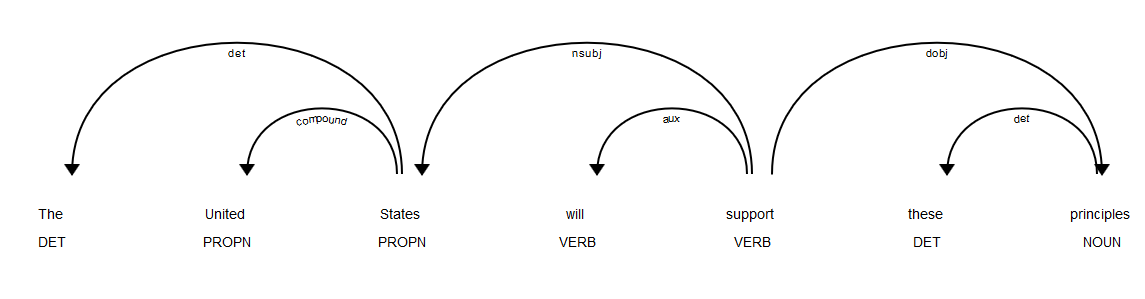

In [25]:
# function for rule 3: noun(subject), verb, noun(object)
def rule3(text):

    doc = nlp(text)

    sent = []

    for token in doc:

        # if the token is a verb
        if (token.pos_=='VERB'):

            phrase =''

            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:

                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):

                    # add subject to the phrase
                    phrase += sub_tok.text

                    # save the root of the verb in phrase
                    phrase += ' '+token.lemma_

                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:

                        # save the object in the phrase
                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):

                            phrase += ' '+sub_tok.text
                            sent.append(phrase)

    return sent

In [28]:
# create a df containing sentence and its output for rule 3
row_list = []

for i in range(len(df2)):

    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    output = rule3(sent)
    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)

df_rule3 = pd.DataFrame(row_list)

In [ ]:
# first 5 rows
df_rule3.head()

,Year,Sentence,Output
0,2002,﻿We meet one year and one day after a terroris...,[attack bring grief]
1,2002,"Yesterday, we remembered the innocent lives t...",[]
2,2002,Today we turn to the urgent duty of protectin...,[]
3,2002,We have accomplished much in the last year in...,[]
4,2002,We have much yet to do in Afghanistan and beyond,[]


In [30]:
# selecting non-empty output rows
#df_show = pd.DataFrame(columns=df_rule3.columns)
df_show = []

for row in range(len(df_rule3)):

    if len(df_rule3.loc[row,'Output'])!=0:
      df_show.append(df_rule3.loc[row,:])

df_show = pd.DataFrame(df_show)
# reset the index
df_show.reset_index(inplace=True, drop=True)

In [ ]:
df_show.head()

,Year,Sentence,Output
0,2012,"As a young man, Chris joined the Peace Corps ...",[Chris join Corps]
1,2012,He would carry that commitment throughout his...,[He carry commitment]
2,2012,"As America’s representative, he helped the Li...",[he help people]
3,2012,"After the revolution, he supported the birth ...","[he support birth, Libyans hold elections]"
4,2012,Chris Stevens loved his work,[Stevens love work]


In [31]:
# number of outputs
df_show.shape

(4021, 3)

In [32]:
# separate subject, verb and object

verb_dict = dict()
dis_dict = dict()
dis_list = []

# iterating over all the sentences
for i in range(len(df_show)):

    # sentence containing the output
    sentence = df_show.loc[i,'Sentence']
    # year of the sentence
    year = df_show.loc[i,'Year']
    # output of the sentence
    output = df_show.loc[i,'Output']

    # iterating over all the outputs from the sentence
    for sent in output:

        # separate subject, verb and object
        n1, v, n2 = sent.split()[:1], sent.split()[1], sent.split()[2:]

        # append to list, along with the sentence
        dis_dict = {'Sentence':sentence,'Year':year,'Noun1':n1,'Verb':v,'Noun2':n2}
        dis_list.append(dis_dict)

        # counting the number of sentences containing the verb
        verb = sent.split()[1]
        if verb in verb_dict:
            verb_dict[verb]+=1
        else:
            verb_dict[verb]=1

df_sep = pd.DataFrame(dis_list)

In [33]:
# first 5 rows
df_sep.head()

,Sentence,Year,Noun1,Verb,Noun2
0,﻿We meet one year and one day after a terroris...,2002,[attack],bring,[grief]
1,The United Nations was born in the hope that ...,2002,[that],survive,[war]
2,The United Nations was born in the hope that ...,2002,[that],survive,"[war, hope]"
3,We created the United Nations Security Counci...,2002,[We],create,[Council]
4,The United States is joining with the world t...,2002,[it],reach,[people]


In [34]:
# top 10 verbs
df_sep['Verb'].value_counts()[:10]

Verb
have       351
take       162
make       139
support     99
give        92
see         80
seek        59
face        57
provide     57
build       52
Name: count, dtype: int64

In [35]:
# selecting a verb and looking at its patterns
df_sep[df_sep['Verb']=='support'].head(15)

,Sentence,Year,Noun1,Verb,Noun2
72,The United States supports political and econ...,2002,[States],support,[liberty]
189,"Arab States, and those who have supported th...",2013,[who],support,[Palestinians]
191,Let us support Israeli and Palestinian leade...,2013,[us],support,[leaders]
214,"In Mali, we supported both the French interv...",2013,[we],support,[intervention]
290,We supported a transfer of power that would ...,2011,[We],support,[transfer]
292,America supports those aspirations,2011,[America],support,[aspirations]
384,The international community must support the...,2007,[community],support,[leaders]
452,The United States will listen to all good id...,2007,[we],support,[changes]
516,Rogue regimes represented in this organ not o...,2017,[regimes],support,[terrorists]
589,"Out of the goodness of our hearts, we offer f...",2017,[we],support,[agreements]


## 6. Rule 4: Relation Extraction part 2

Sample sentences from the dataset:
1.  With support from **many countries**, we have made **impressive progress**
2.  Because of their **unique expertise** and regional legitimacy, they can be instruments for solving some of the **hardest challenges** we face
3.  We are right to aim high and take on the **mightiest tasks**

In [36]:
from spacy import displacy
displacy.render(nlp("With support from many countries, we have made impressive progress"), style='dep',jupyter=True)

In [37]:
# function for rule 4
def rule4(text):

    doc = nlp(text)

    pat = []

    # iterate over tokens
    for token in doc:
        phrase = ''
        # if the word is a subject noun or an object noun
        if (token.pos_ == 'NOUN')\
            and (token.dep_ in ['dobj','pobj','nsubj','nsubjpass']):

            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective or has a compound dependency
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += subtoken.text + ' '

            if len(phrase)!=0:
                phrase += token.text

        if  len(phrase)!=0:
            pat.append(phrase)


    return pat

In [38]:
# create a df containing sentence and its output for rule 4
row_list = []

for i in range(len(df2)):

    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    # rule
    output = rule4(sent)

    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)

df_rule4 = pd.DataFrame(row_list)

In [39]:
# first 5 rows
df_rule4.head()

,Year,Sentence,Output
0,2002,﻿We meet one year and one day after a terroris...,"[terrorist attack, many citizens]"
1,2002,"Yesterday, we remembered the innocent lives t...",[innocent lives]
2,2002,Today we turn to the urgent duty of protectin...,"[urgent duty, other lives]"
3,2002,We have accomplished much in the last year in...,[last year]
4,2002,We have much yet to do in Afghanistan and beyond,[]


In [40]:
# selecting non-empty outputs
#df_show = pd.DataFrame(columns=df_rule4.columns)
df_show = []

for row in range(len(df_rule4)):

    if len(df_rule4.loc[row,'Output'])!=0:
      df_show.append(df_rule4.loc[row,:])

df_show = pd.DataFrame(df_show)
# reset the index
df_show.reset_index(inplace=True, drop=True)

In [41]:
# number of matches
df_show.shape

(6218, 3)

In [42]:
# first 15 rows
df_show.head(15)

,Year,Sentence,Output
0,2002,﻿We meet one year and one day after a terroris...,"[terrorist attack, many citizens]"
1,2002,"Yesterday, we remembered the innocent lives t...",[innocent lives]
2,2002,Today we turn to the urgent duty of protectin...,"[urgent duty, other lives]"
3,2002,We have accomplished much in the last year in...,[last year]
4,2002,Many nations represented here have joined in ...,"[Many nations, global terror]"
5,2002,The United Nations was born in the hope that ...,"[world war, old patterns]"
6,2002,"After generations of deceitful dictators, bro...","[deceitful dictators, human dignity]"
7,2002,Our commitment to human dignity is challenged...,"[human dignity, persistent poverty]"
8,2002,The United States is joining with the world t...,[medical care]
9,2002,As a symbol of our commitment to human dignit...,[human dignity]


### 7. Combining Rule 3 and Rule 4

Sample sentences:
1.  With support from many countries, **we** have **made impressive progress**
2. **It** will **require military planners** the world over to recognize that training for peace operations is a legitimate part of every nation security strategy

In [43]:
# modifying rule 4
def rule4_mod(text,index):

    doc = nlp(text)

    phrase = ''

    # iterate over tokens
    for token in doc:

        if token.i == index:

            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += ' '+subtoken.text
            break

    return phrase

In [44]:
# using rule 3 and rule 4
def rule3_mod(text):

    doc = nlp(text)

    sent = []

    for token in doc:
        # root word
        if (token.pos_=='VERB'):

            phrase =''

            # only extract noun or pronoun subjects
            for sub_tok in token.lefts:

                if (sub_tok.dep_ in ['nsubj','nsubjpass']) and (sub_tok.pos_ in ['NOUN','PROPN','PRON']):

                    # look for subject modifier
                    adj = rule4_mod(text,sub_tok.i)

                    phrase += adj + ' ' + sub_tok.text

                    # save the root word of the word
                    phrase += ' '+token.lemma_

                    # check for noun or pronoun direct objects
                    for sub_tok in token.rights:

                        if (sub_tok.dep_ in ['dobj']) and (sub_tok.pos_ in ['NOUN','PROPN']):

                            # look for object modifier
                            adj = rule4_mod(text,sub_tok.i)

                            phrase += adj+' '+sub_tok.text
                            sent.append(phrase)

    return sent

In [45]:
# create a df containing sentence and its output for modified rule
row_list = []

for i in range(len(df2)):

    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']
    output = rule3_mod(sent)
    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)

df_rule = pd.DataFrame(row_list)

In [46]:
# first 5 rows
df_rule.head()

,Year,Sentence,Output
0,2002,﻿We meet one year and one day after a terroris...,[ terrorist attack bring grief]
1,2002,"Yesterday, we remembered the innocent lives t...",[]
2,2002,Today we turn to the urgent duty of protectin...,[]
3,2002,We have accomplished much in the last year in...,[]
4,2002,We have much yet to do in Afghanistan and beyond,[]


In [47]:
# selecting non-empty outputs
#df_show_mod = pd.DataFrame(columns=df_rule.columns)
df_show_mod = []

for row in range(len(df_rule)):

    if len(df_rule.loc[row,'Output'])!=0:
      df_show_mod.append(df_rule.loc[row,:])

df_show_mod = pd.DataFrame(df_show_mod)
# reset the index
df_show_mod.reset_index(inplace=True, drop=True)

In [48]:
# number of matches
df_show_mod.shape

(4021, 3)

In [49]:
# first 15 rows
df_show_mod.head(20)

,Year,Sentence,Output
0,2002,﻿We meet one year and one day after a terroris...,[ terrorist attack bring grief]
1,2002,The United Nations was born in the hope that ...,"[ that survive world war, that survive world ..."
2,2002,We created the United Nations Security Counci...,[ We create Nations Security Council]
3,2002,The United States is joining with the world t...,[ it reach people]
4,2002,"Like all other people, Palestinians deserve a...","[ Palestinians deserve government, that serve..."
5,2002,My nation will continue to encourage all part...,[ we seek just settlement]
6,2002,"Above all, our principles and our security ar...",[ that accept law]
7,2002,"In the attacks on America a year ago, we saw ...",[ we see destructive intentions]
8,2002,"In cells and camps, terrorists are plotting f...",[ terrorists plot further destruction]
9,2002,And our greatest fear is that terrorists will...,[ terrorists find shortcut]


In [51]:
# Sample sentence
print(df_show_mod.loc[3,'Output'])
print(df_show_mod.loc[3,'Sentence'])

[' it reach people']
 The United States is joining with the world to supply aid where it reaches people and lifts up lives, to extend trade and the prosperity it brings, and to bring medical care where it is desperately needed


In [52]:
# Sample sentence
print(df_show_mod.loc[27,'Output'])
print(df_show_mod.loc[27,'Sentence'])

[' regime possess nuclear weapon']
 We know now that, were it not for that war, the regime in Iraq would likely have possessed a nuclear weapon no later than 1993


## 8. Rule 5: Patterns using Preposition

Sample sentences:
1.  We all believe the **benefits of globalization** must be allocated more broadly within and among societies
2. As the Millennium Summit reflected, we have no **shortage of** worthy **goals**
3. It should preserve the special **responsibility for peacekeeping** of the Security Council permanent members

In [53]:


# Sample sentence
from spacy import displacy
displacy.render(nlp('''We all believe the benefits of globalization must
be allocated more broadly within and among societies'''),
                style='dep',jupyter=True)

In [54]:
# rule 5 function
def rule5(text):

    doc = nlp(text)

    sent = []

    for token in doc:

        # look for prepositions
        if token.pos_=='ADP':

            phrase = ''

            # if its head word is a noun
            if token.head.pos_=='NOUN':

                # append noun and preposition to phrase
                phrase += token.head.text
                phrase += ' '+token.text

                # check the nodes to the right of the preposition
                for right_tok in token.rights:
                    # append if it is a noun or proper noun
                    if (right_tok.pos_ in ['NOUN','PROPN']):
                        phrase += ' '+right_tok.text

                if len(phrase)>2:
                    sent.append(phrase)

    return sent

In [55]:
# create a df containing sentence and its output for rule 5
row_list = []

for i in range(len(df2)):

    sent = df2.loc[i,'Sentence']
    year = df2.loc[i,'Year']

    # rule
    output = rule5(sent)

    dict1 = {'Year':year,'Sentence':sent,'Output':output}
    row_list.append(dict1)

df_rule = pd.DataFrame(row_list)

In [56]:
# first 5 rows
df_rule.head()

,Year,Sentence,Output
0,2002,﻿We meet one year and one day after a terroris...,[citizens of world]
1,2002,"Yesterday, we remembered the innocent lives t...",[]
2,2002,Today we turn to the urgent duty of protectin...,[duty of]
3,2002,We have accomplished much in the last year in...,[]
4,2002,We have much yet to do in Afghanistan and beyond,[]


In [63]:
# select non-empty outputs
#df_show = pd.DataFrame(columns=df_rule.columns)
df_show = []

for row in range(len(df_rule)):

    if len(df_rule.loc[row,'Output'])!=0:
      df_show.append(df_rule.loc[row,:].to_frame().T)
#      df_show.append(df_rule.loc[row,:], ignore_index=True)


# reset the index
#df_show.reset_index(inplace = True, drop = True)
df_show = pd.concat(df_show, ignore_index=True)

In [64]:
# first 5 rows
df_show.head()

,Year,Sentence,Output
0,2002,﻿We meet one year and one day after a terroris...,[citizens of world]
1,2002,Today we turn to the urgent duty of protectin...,[duty of]
2,2002,Many nations represented here have joined in ...,"[fight against terror, people of States]"
3,2002,The United Nations was born in the hope that ...,"[hope of world, patterns of conflict]"
4,2002,The founding Members resolved that the peace ...,"[peace of world, wickedness of man]"


In [65]:
# separate noun, preposition and noun

prep_dict = dict()
dis_dict = dict()
dis_list = []

# iterating over all the sentences
for i in range(len(df_show)):

    # sentence containing the output
    sentence = df_show.loc[i,'Sentence']
    # year of the sentence
    year = df_show.loc[i,'Year']
    # output of the sentence
    output = df_show.loc[i,'Output']

    # iterating over all the outputs from the sentence
    for sent in output:

        # separate subject, verb and object
        n1, p, n2 = sent.split()[0], sent.split()[1], sent.split()[2:]

        # append to list, along with the sentence
        dis_dict = {'Sentence':sentence,'Year':year,'Noun1':n1,'Preposition':p,'Noun2':n2}
        dis_list.append(dis_dict)

        # counting the number of sentences containing the verb
        prep = sent.split()[1]
        if prep in prep_dict:
            prep_dict[prep]+=1
        else:
            prep_dict[prep]=1

df_sep= pd.DataFrame(dis_list)

In [68]:
# first 10 rows
df_sep.head(20)

,Sentence,Year,Noun1,Preposition,Noun2
0,﻿We meet one year and one day after a terroris...,2002,citizens,of,[world]
1,Today we turn to the urgent duty of protectin...,2002,duty,of,[]
2,Many nations represented here have joined in ...,2002,fight,against,[terror]
3,Many nations represented here have joined in ...,2002,people,of,[States]
4,The United Nations was born in the hope that ...,2002,hope,of,[world]
5,The United Nations was born in the hope that ...,2002,patterns,of,[conflict]
6,The founding Members resolved that the peace ...,2002,peace,of,[world]
7,The founding Members resolved that the peace ...,2002,wickedness,of,[man]
8,"After generations of deceitful dictators, bro...",2002,generations,of,[dictators]
9,"After generations of deceitful dictators, bro...",2002,standards,of,[dignity]


In [69]:
# top 10 prepositions
df_sep['Preposition'].value_counts()[:10]

Preposition
of         6110
in         1211
for         887
to          567
on          343
with        250
between     202
from        139
as          120
against     117
Name: count, dtype: int64

In [70]:
# selecting a preposition and looking at its patterns
df_sep[df_sep['Preposition'] == 'against'].head(10)

,Sentence,Year,Noun1,Preposition,Noun2
2,Many nations represented here have joined in ...,2002,fight,against,[terror]
25,"In cells and camps, terrorists are plotting f...",2002,war,against,[civilization]
48,In violation of Security Council resolution 1...,2002,violence,against,[Iran]
183,"There, peaceful protests against an authorit...",2013,protests,against,[regime]
204,When I stated my willingness to order a limi...,2013,strike,against,[regime]
209,"The ban against the use of chemical weapons,...",2013,ban,against,[use]
261,We will confront external aggression against...,2013,aggression,against,[allies]
291,"Meanwhile, the Supreme Leader has issued a f...",2013,fatwa,against,[development]
369,There will be times when the breakdown of so...,2013,violence,against,[civilians]
577,North Korea has yet to take concrete steps t...,2011,action,against,[South]
